## 1. Import the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
%matplotlib inline

## 2. Load the dataset:

In [2]:
data = pd.read_csv("Queries.csv")
data.head(2)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02


## 3. Exploratory Data Analysis:

The datatypes of the features:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


Check for any Null-Values:

In [4]:
data.isna().sum()

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

There is no any null data.

The **CTR** seems to have object data type, to perform any operations in the future, let's convert it to float type:

In [5]:
data['CTR'] = data['CTR'].str.rstrip("%").astype('float')/100
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   float64
 4   Position     1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [6]:
data.head(5)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


## 4. Count the most frequent words from the query:

In [7]:
# A function to find words and split them and discard punctuations:
def split_into_tokens(query):
    words = re.findall(r'\b[a-z]+\b', query.lower())
    return words


# Creating a counter to count the word frequency:
word_frequency = Counter()
for query in data['Top queries']:
    word_frequency.update(split_into_tokens(query))

#### The top 20 most common words:

In [8]:
top_20_common_df = pd.DataFrame(word_frequency.most_common(20), columns=["Words", "Counts"])
top_20_common_df.head(20)

,Words,Counts
0,python,562
1,in,232
2,code,138
3,learning,133
4,machine,123
5,using,105
6,game,103
7,number,95
8,to,82
9,prediction,70


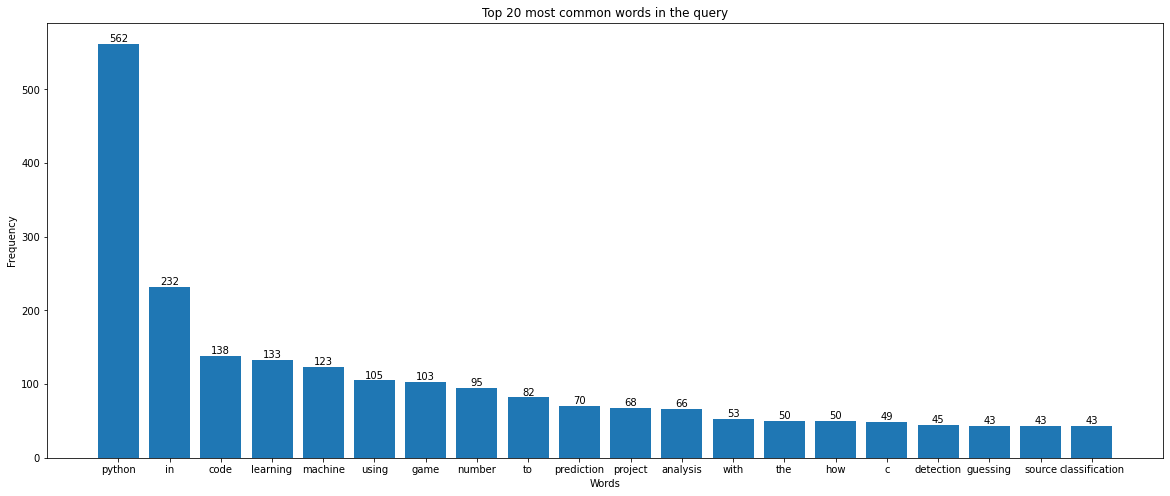

In [9]:
plt.figure(figsize=(20, 8))
bars = plt.bar(top_20_common_df.Words, top_20_common_df.Counts)
plt.bar_label(bars)
plt.title("Top 20 most common words in the query")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [10]:
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


#### Top 10 Queries and their Impressions based on the number of Clicks:

In [11]:
top_10_queries_clicks = data.nlargest(n=10, columns='Clicks')[['Top queries', 'Clicks']]
top_10_queries_impression = data.nlargest(n=10, columns='Impressions')[['Top queries', 'Impressions']]

In [12]:
top_10_queries_clicks

,Top queries,Clicks
0,number guessing game python,5223
1,thecleverprogrammer,2809
2,python projects with source code,2077
3,classification report in machine learning,2012
4,the clever programmer,1931
5,standard scaler in machine learning,1559
6,aman kharwal,1490
7,python turtle graphics code,1455
8,python game projects with source code,1421
9,82 python projects with source code,1343


In [13]:
top_10_queries_impression

,Top queries,Impressions
2,python projects with source code,73380
82,r2 score,56322
34,machine learning roadmap,42715
21,classification report,39896
232,standardscaler,39267
91,facebook programming languages,36055
15,rock paper scissors python,35824
36,pandas datareader,26663
180,classification_report,24917
54,pandas_datareader,24689


#### Plotting the top 10 Queries based on clicks:

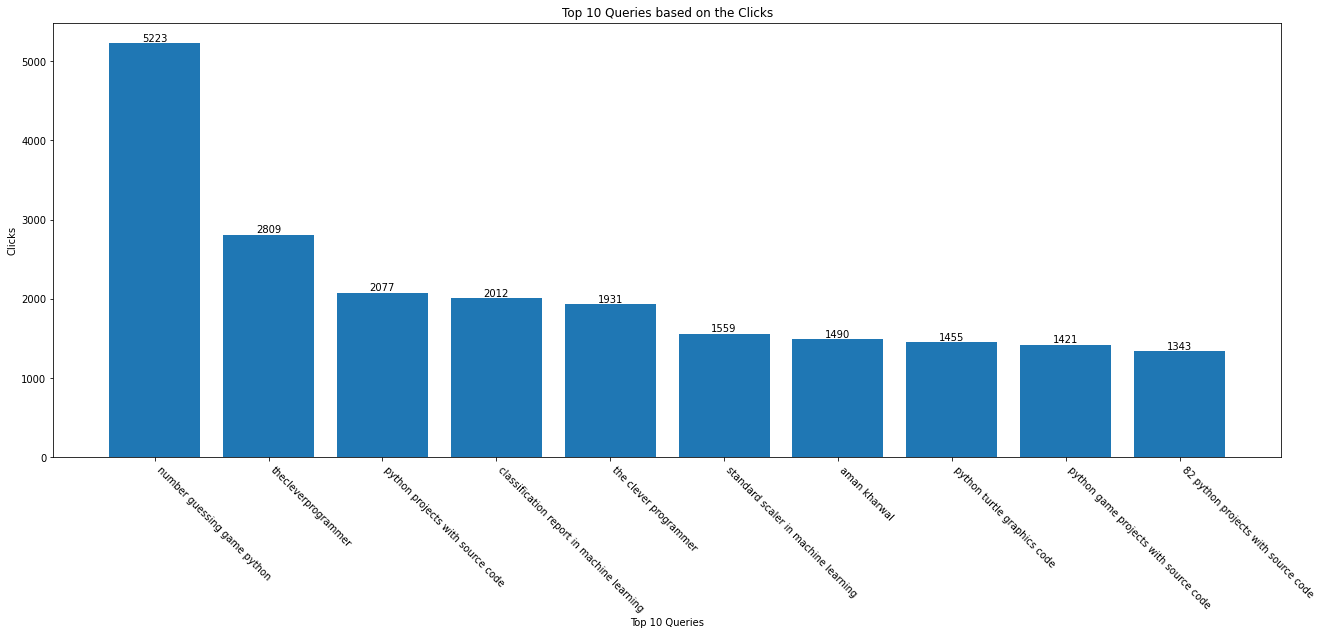

In [35]:
plt.figure(figsize=(22, 8))
bars = plt.bar(top_10_queries_clicks['Top queries'],  top_10_queries_clicks['Clicks'])
plt.bar_label(bars)
plt.xticks(rotation=-45, ha='left', fontsize=10)
plt.title("Top 10 Queries based on the Clicks")
plt.xlabel("Top 10 Queries")
plt.ylabel("Clicks")
plt.show()

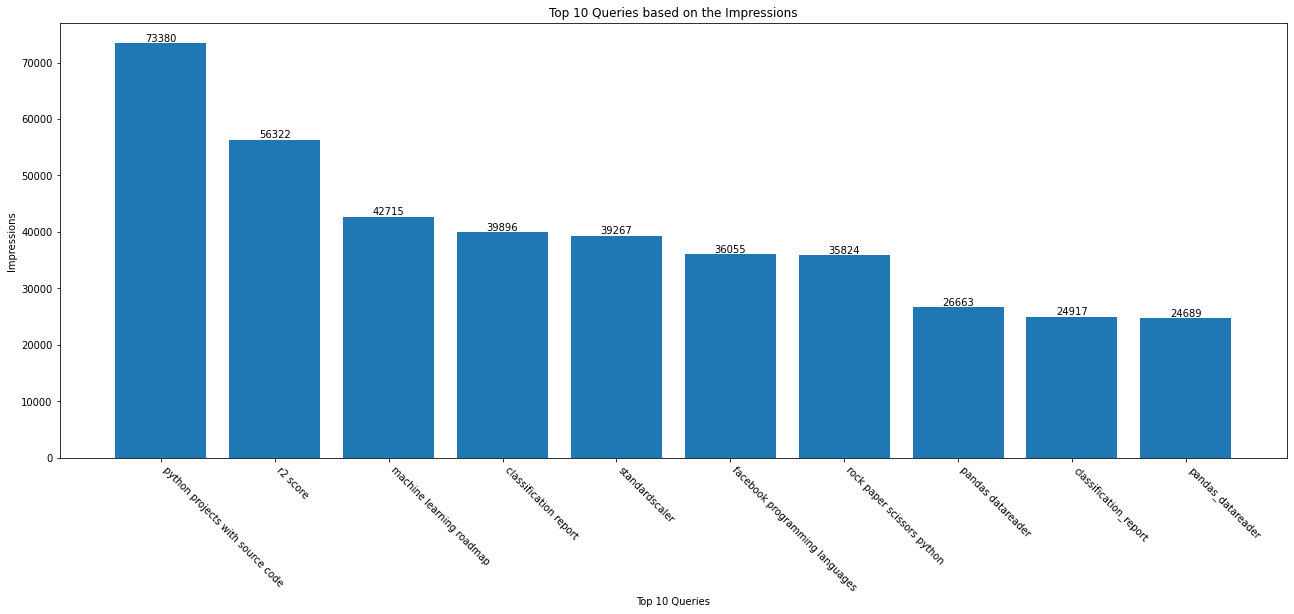

In [34]:
plt.figure(figsize=(22, 8))
bars = plt.bar(top_10_queries_impression['Top queries'], top_10_queries_impression['Impressions'])
plt.bar_label(bars)
plt.xticks(top_10_queries_impression['Top queries'], rotation=-45, ha='left')
plt.xlabel("Top 10 Queries")
plt.ylabel("Impressions")
plt.title("Top 10 Queries based on the Impressions")
plt.show()